In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class SingleLayerNeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layer = nn.Linear(self.input_dim, self.output_dim, bias=False)
    
    def forward(self, data):
        out = self.layer(data)
        return out

In [2]:
data = pd.read_csv('data-with-stats.csv', dtype=str)
data

,Do you want to be in society?,Do you make an attempt to socialise?,Do you consume things to alter your perspective? (Alcohol and stuff),Are you depressed?,Do you try to improve yourself?,Would you compromise with a friend?,If you and another person were both thirsty and you only had enough water for one person; would you share with the other person?,If a colleague invited you to do something with them; how would you answer? (Date; hang-out; party; etc.),Are you anxious of social interaction?,Do you think you fit in with other people?,...,Are you physically in-shape?,What is your biological sex?,How tall are you?,How attractive are you (from 0 to 10),What is your BMI?,How many friends and colleagues do you currently have?,Rate your life right now.,Which climate do you live in?,X,Y
0,Y,Y,Y,0,0,A,N,Y,0,A,...,N,othersex,11,23,34,43,53,polar,-3,2.25
1,D,A,0,A,A,D,Y,Y,0,0,...,Y,male,12,23,32,41,54,tropical,-1,4
2,D,0,Y,N,Y,Y,Y,Y,N,N,...,N,othersex,14,23,33,41,53,mild,-2,0.75
3,A,A,D,D,Y,N,N,N,A,N,...,Y,female,12,21,32,41,52,dry,-0.5,1.5
4,0,Y,Y,D,Y,0,Y,N,0,Y,...,D,female,14,22,32,41,52,snow,-3.5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,A,A,0,Y,N,Y,Y,Y,0,...,0,female,15,24,31,43,54,dry,-0.5,3.5
196,Y,N,A,N,0,0,Y,Y,D,N,...,A,female,15,21,32,42,53,mild,-2.5,0.75
197,A,D,Y,N,D,N,N,N,0,0,...,0,female,11,22,32,42,51,tropical,0.5,-3.25
198,Y,A,Y,D,Y,N,Y,N,Y,A,...,D,female,12,23,31,42,52,tropical,0.5,3


In [3]:
XY = data.values[:,-2:].astype(float)
XY

array([[-3.  ,  2.25],
       [-1.  ,  4.  ],
       [-2.  ,  0.75],
       [-0.5 ,  1.5 ],
       [-3.5 , -2.  ],
       [-5.5 , -2.  ],
       [-7.  ,  2.25],
       [-3.5 , -2.  ],
       [-3.  ,  3.25],
       [ 0.5 ,  6.  ],
       [-2.  , -3.  ],
       [-5.  ,  0.75],
       [-6.  ,  3.5 ],
       [-2.  , -4.5 ],
       [-2.  ,  2.25],
       [-2.  ,  2.25],
       [-2.5 , -3.25],
       [ 3.  ,  0.75],
       [-6.  , -4.25],
       [-5.  ,  3.  ],
       [ 2.5 ,  2.25],
       [-3.  ,  0.5 ],
       [ 4.5 ,  2.5 ],
       [-1.  , -1.5 ],
       [-7.  , -2.25],
       [-2.  , -2.  ],
       [-2.  , -2.75],
       [-2.  ,  2.25],
       [-2.  , -1.5 ],
       [-4.  ,  0.  ],
       [ 0.  , -0.25],
       [-6.  ,  0.  ],
       [-1.  , -2.75],
       [ 3.  , -0.5 ],
       [-4.5 ,  0.5 ],
       [-4.  ,  4.25],
       [-2.  ,  0.75],
       [-3.  , -0.25],
       [ 1.  ,  2.5 ],
       [ 0.  , -4.5 ],
       [ 0.5 ,  5.25],
       [ 3.  ,  0.5 ],
       [-2.  , -3.25],
       [-5.

In [53]:
print(f'x mean: {round(XY[:,0].mean()*2)/2}, y mean: {round(XY[:,1].mean()*4)/4}')

x mean: -2.0, y mean: 0.0


In [4]:
# one-hot encode the categorical data
answers = pd.get_dummies(data[data.columns[:-2]])
answers

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
196,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
197,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
198,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


/home/nathanielbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


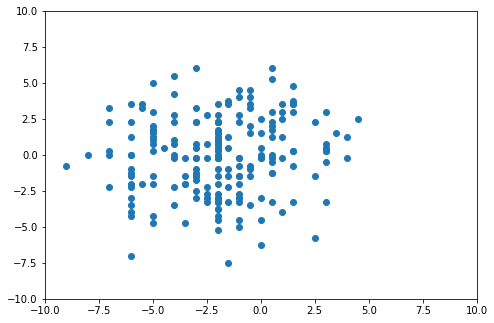

In [23]:
# plot all the results
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(XY[:,0], XY[:,1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
fig.show()

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(answers, XY)
vals = pd.DataFrame([[round(val*2)/2 for val in reg.coef_[0]], 
    [round(val*4)/4 for val in reg.coef_[1]]], columns=pd.get_dummies(data[data.columns[:-2]]).columns)
vals.index = ['X', 'Y']
vals.to_csv('weights.csv')

In [15]:
answers = answers.values
answers = answers.astype(int)
XY = XY.astype(float)
# reserve 20 trials as testing data
CUTOFF = answers.shape[0]-20
train_ans, train_res = answers[:CUTOFF], XY[:CUTOFF]
test_ans, test_res = answers[CUTOFF:], XY[CUTOFF:]
# load the data as answers-results tuples
train_dataset = list(zip(torch.from_numpy(train_ans), torch.from_numpy(train_res)))
test_dataset = list(zip(torch.from_numpy(test_ans), torch.from_numpy(test_res)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [40]:
model = SingleLayerNeuralNetwork(answers.shape[1], XY.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.1)
criterion = nn.L1Loss()
losses = []
EPOCHS = 10000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in train_loader:
        ans, res = ans.float(), res.float()
        optimizer.zero_grad()
        pred_res = model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')
    if loss <= 0.5:
        break

epoch: 100/10000, loss: 320.32989794015884
epoch: 200/10000, loss: 268.4062982648611
epoch: 300/10000, loss: 221.02763325721025
epoch: 400/10000, loss: 178.23420687019825
epoch: 500/10000, loss: 143.79289647191763
epoch: 600/10000, loss: 117.2576453089714
epoch: 700/10000, loss: 97.37736876308918
epoch: 800/10000, loss: 82.53291760385036
epoch: 900/10000, loss: 71.37192624807358
epoch: 1000/10000, loss: 62.15561060607433
epoch: 1100/10000, loss: 54.17237336933613
epoch: 1200/10000, loss: 47.57794873416424
epoch: 1300/10000, loss: 42.00743696093559
epoch: 1400/10000, loss: 36.86572644114494
epoch: 1500/10000, loss: 32.38590455055237
epoch: 1600/10000, loss: 28.2512746155262
epoch: 1700/10000, loss: 24.937270417809486
epoch: 1800/10000, loss: 22.278294056653976
epoch: 1900/10000, loss: 20.332837373018265
epoch: 2000/10000, loss: 18.69446425139904
epoch: 2100/10000, loss: 17.30025765299797
epoch: 2200/10000, loss: 16.08104433119297
epoch: 2300/10000, loss: 14.991795986890793
epoch: 2400/1

In [41]:
params = list(model.parameters())
params

[Parameter containing:
 tensor([[-2.8641e-02, -2.9003e-02, -2.8820e-02, -2.8442e-02, -2.8807e-02,
          -6.2293e-02, -6.2295e-02, -6.2157e-02, -6.2314e-02, -6.2378e-02,
          -2.8227e-02, -2.8130e-02, -2.7562e-02, -2.8060e-02, -2.7703e-02,
          -1.5259e-02, -1.5299e-02, -1.5283e-02, -1.5469e-02, -1.5102e-02,
          -4.7664e-02, -4.7688e-02, -4.7187e-02, -4.7616e-02, -4.7235e-02,
          -1.8411e-02, -1.8223e-02, -1.7729e-02, -1.8270e-02, -1.8704e-02,
          -5.2385e-02, -5.2940e-02, -8.8450e-02, -8.8082e-02, -3.0803e-02,
          -3.0445e-02, -3.0622e-02, -3.0807e-02, -3.0918e-02, -3.0014e-02,
          -3.0302e-02, -3.0027e-02, -3.0118e-02, -3.0151e-02, -9.9604e-02,
          -9.9802e-02, -7.5166e-02, -7.5784e-02, -7.5743e-02, -7.5685e-02,
          -7.5708e-02, -4.7054e-02, -4.6682e-02, -4.6792e-02, -4.6802e-02,
          -4.6767e-02, -7.7502e-02, -7.7084e-02, -4.2371e-02, -4.2194e-02,
          -4.2656e-02, -4.2648e-02, -4.2191e-02, -2.1357e-02, -2.0841e-02,
  

In [42]:
x_weights = params[0][0].detach()
columns = pd.get_dummies(data[data.columns[:-2]]).columns
x_weights = pd.DataFrame(np.array([x_weights.numpy()]), columns=columns)
# observe from the .csv files that X is always in increments of 0.5
x_weights = x_weights.applymap(lambda val: round(val*2)/2)
x_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y_weights = params[0][1].detach()
y_weights = pd.DataFrame(np.array([y_weights.numpy()]), columns=columns)
# observe from the .csv files that Y is always in increments of 0.25
y_weights = y_weights.applymap(lambda val: round(val*4)/4)
y_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0.0,1.0,-1.0,-0.25,0.25,0.0,1.0,-1.0,-0.25,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
all_weights = pd.concat([x_weights, y_weights], ignore_index=True)
all_weights.index = ['X','Y']
all_weights.to_csv('weights.csv')
all_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
X,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y,0.0,1.0,-1.0,-0.25,0.25,0.0,1.0,-1.0,-0.25,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
all_weights = pd.read_csv('weights.csv', index_col=0)
x_weights = all_weights.loc['X']
y_weights = all_weights.loc['Y']
# see the diffs after rounding the weights
x_tensor = torch.from_numpy(x_weights.values).float()
y_tensor = torch.from_numpy(y_weights.values).float()
# diffs = []
for ans, res in train_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item(),(ans@y_tensor.T).item()]]))
    diff = res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()
    print(f'diff: {diff}')
#     diffs.append(res.detach().numpy().flatten()-pred_res.detach().numpy().flatten())
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item(),(ans@y_tensor.T).item()]]))
    diff = res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()
    print(f'diff: {diff}')
#     diffs.append(res.detach().numpy().flatten()-pred_res.detach().numpy().flatten())
# diffs = np.array(diffs)

diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]
diff: [-2.   -0.25]


In [46]:
from collections import OrderedDict
model.load_state_dict(OrderedDict({'layer.weight': torch.from_numpy(np.array([x_tensor.numpy().flatten(), y_tensor.numpy().flatten()]))}), strict=False)
torch.save(model.state_dict(), 'model.pt')

In [ ]:
stat_corrections = pd.DataFrame(np.hstack((data[data.columns[-10:-3]], diffs)), 
                                columns=list(data.columns[-10:-3])+['difference_X', 'difference_Y'])
stat_corrections

In [ ]:
def classify(x, y):
    if y > 6:
        if x < -6:
            return 'Social outcast'
        elif x < 0:
            return 'Simp'
        elif x < 6:
            return 'Party dude'
        else:
            return 'Chad'
    elif y > 0:
        if x < -4:
            return 'Failed normie'
        elif x < 0:
            return 'Niche normie'
        elif x < 5:
            return 'Normie'
        else:
            return 'Turbo normie'
    elif y > -6:
        if x < -4:
            return 'Sperg'
        elif x < 0:
            return 'Lame normie'
        elif x < 6:
            return 'Cool normie'
        else:
            return 'Based normie'
    else:
        if x < -6:
            return 'Wizard'
        elif x < 0:
            return 'Edge Lord'
        elif x < 5:
            return 'Sadboy'
        else:
            return 'Sociopath'